In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap
import cv2
from copy import copy 
import itertools
import json

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

## Synthetic Dataset Exploration

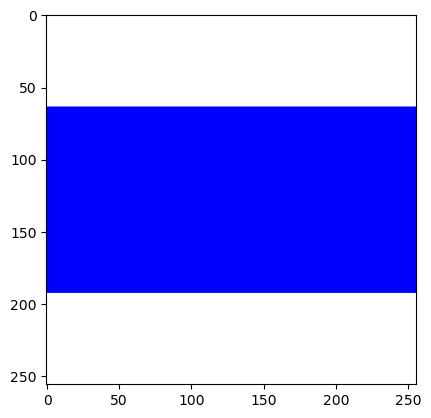

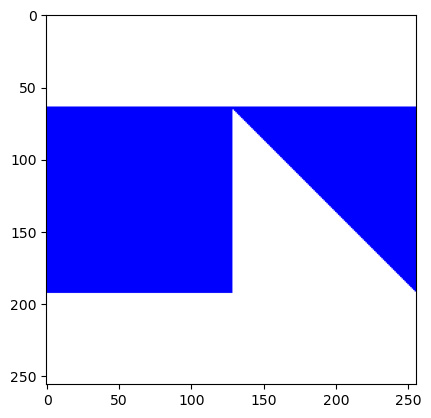

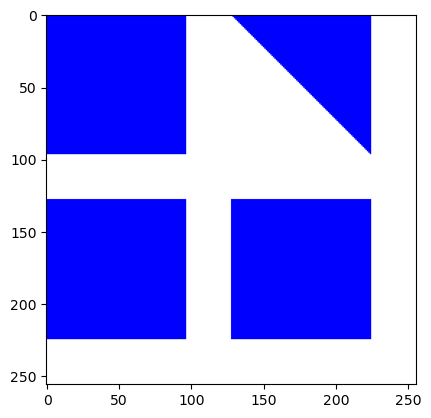

<Figure size 640x480 with 0 Axes>

In [24]:
for num_objects in [1,2,4]:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/1.png".format(
        num_objects)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()

## Impact of Various Factors

### Impact of Model Size

In [38]:
for model_size in range(3,8):
    model_name = 'small{}'.format(model_size)
    file_loc = "results/synthetic/objects=2_noisy=False_wd=0.0004_model={}_optimizer=sgd_seed=42/results.json".format(
        model_name)
    results = json.loads(open(file_loc,"r").read())
    print(results['adversarial_activations'])

[1.0, 0.0, 0.0, 1.0]


FileNotFoundError: [Errno 2] No such file or directory: 'results/synthetic/objects=2_noisy=False_wd=0.0004_model=small4_optimizer=sgd_seed=42/results.json'

### Impact of Optimizer (SAM)

### Impact of Noisy Dataset 

### Impact of Dataset

## Explanation Qualities

### Quantiative Analysis

In [10]:
seed = 42

explanation_metrics = {}

for i in [1,2,4]:
    explanation_i = json.load(open("results/explanations/objects={}_seed=42/evaluation.json".format(i)))
    for key in explanation_i:
        for sub_key in explanation_i[key]:
            explanation_i[key][sub_key] = (np.mean(explanation_i[key][sub_key]),np.std(explanation_i[key][sub_key]))
    explanation_metrics[i] = explanation_i 

In [14]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['distances']:
        avg_value = explanation_metrics[num_objects]['distances'][key][0]
        avg_value = round(avg_value,2)
        print("Distance between small and large model explanations {}: {}".format(key,avg_value))

==1==
Distance between small and large model explanations saliency: 0.06
Distance between small and large model explanations gradcam: 0.32
Distance between small and large model explanations integrated gradients: 0.02
==2==
Distance between small and large model explanations saliency: 0.16
Distance between small and large model explanations gradcam: 0.34
Distance between small and large model explanations integrated gradients: 0.02
==4==
Distance between small and large model explanations saliency: 0.29
Distance between small and large model explanations gradcam: 0.24
Distance between small and large model explanations integrated gradients: 0.01


In [16]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['small_intensities']:
        avg_value = explanation_metrics[num_objects]['small_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in small models {}: {}".format(key,avg_value))

==1==
Left-side localization in small models saliency: 0.83
Left-side localization in small models gradcam: 0.51
Left-side localization in small models integrated gradients: 0.52
==2==
Left-side localization in small models saliency: 0.82
Left-side localization in small models gradcam: 0.5
Left-side localization in small models integrated gradients: 0.52
==4==
Left-side localization in small models saliency: 0.89
Left-side localization in small models gradcam: 0.48
Left-side localization in small models integrated gradients: 0.51


In [17]:
for num_objects in explanation_metrics:
    print("=={}==".format(num_objects))
    for key in explanation_metrics[num_objects]['large_intensities']:
        avg_value = explanation_metrics[num_objects]['large_intensities'][key][0]
        avg_value = round(avg_value,2)
        print("Left-side localization in large models {}: {}".format(key,avg_value))

==1==
Left-side localization in large models saliency: 0.88
Left-side localization in large models gradcam: 0.42
Left-side localization in large models integrated gradients: 0.53
==2==
Left-side localization in large models saliency: 0.92
Left-side localization in large models gradcam: 0.44
Left-side localization in large models integrated gradients: 0.54
==4==
Left-side localization in large models saliency: 0.86
Left-side localization in large models gradcam: 0.53
Left-side localization in large models integrated gradients: 0.5


### Qualitative Results

In [19]:
num_objects = 2

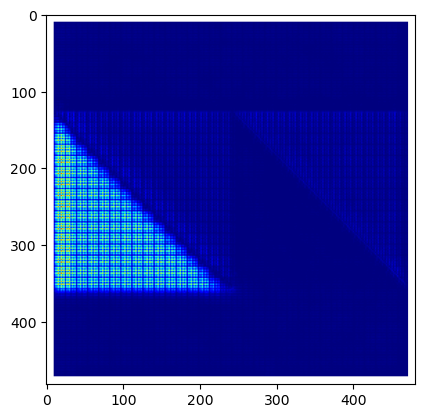

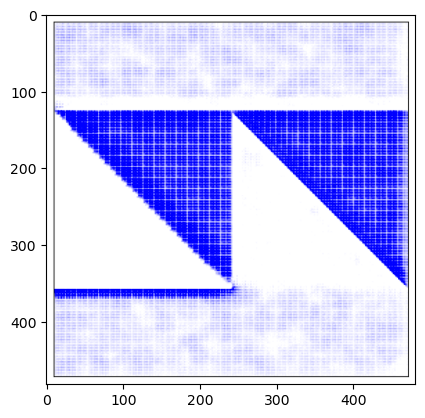

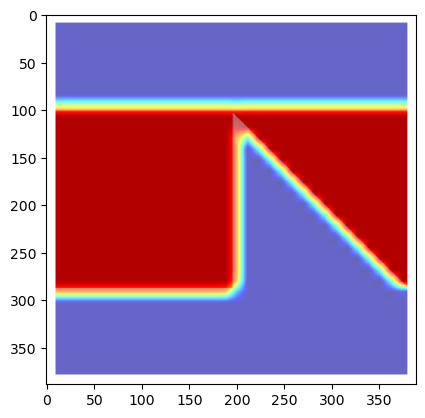

<Figure size 640x480 with 0 Axes>

In [21]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small3_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


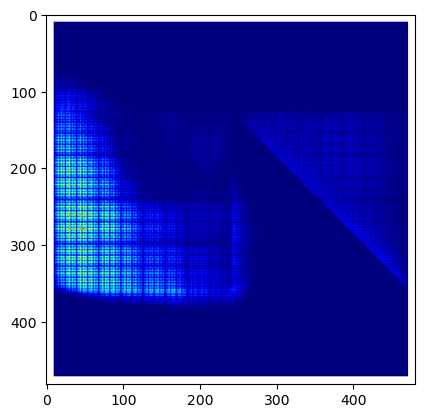

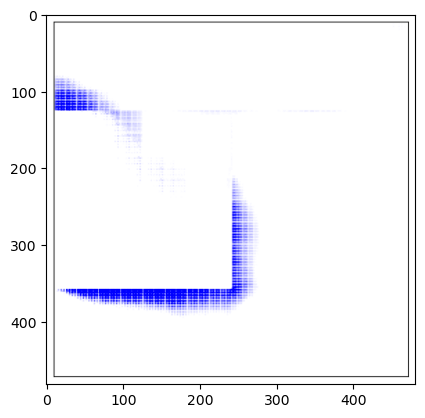

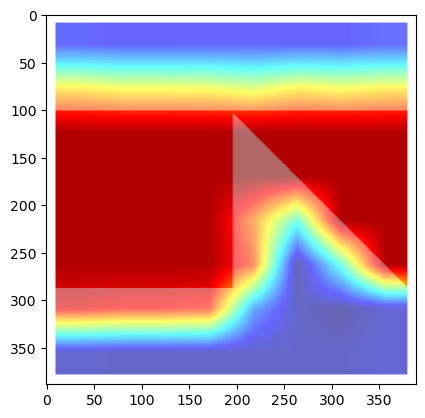

<Figure size 640x480 with 0 Axes>

In [22]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small5_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()


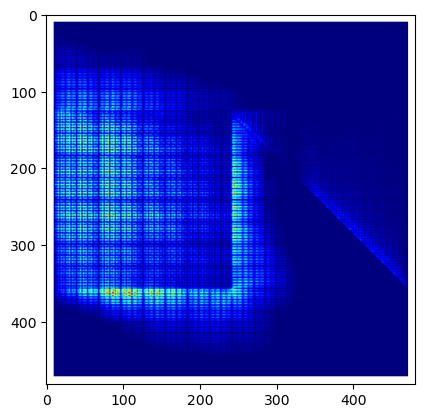

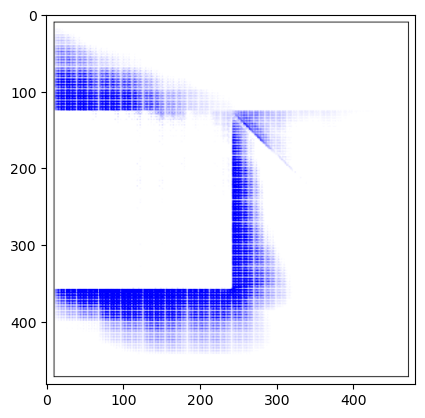

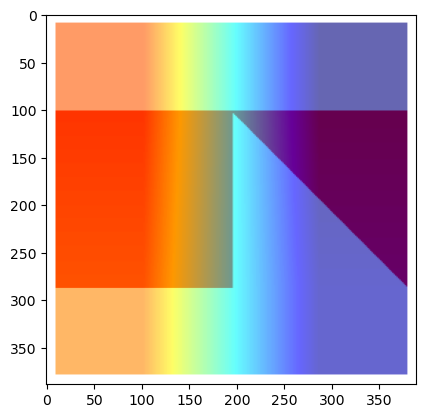

<Figure size 640x480 with 0 Axes>

In [23]:
for method in ['saliency','integrated_gradients','gradcam']:
    file_loc = "results/synthetic/objects={}_noisy=False_wd=0.0004_model=small7_optimizer=sgd_seed=42/{}.png".format(
        num_objects,method)
    img = Image.open(file_loc)
    plt.imshow(img)
    plt.figure()
